<a href="https://colab.research.google.com/github/ioloi1128/IPCS1121_HW/blob/main/IPCS1121_Heatwave_HW1_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IPCS Heatwave HW1:
**Search two heatwave news, plot it and write done what you have observed.**


Reference:


https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/reanalysis-heatwave.ipynb

https://xclim.readthedocs.io/en/stable/readme.html


Heatwave event: 2020 Sept, France


https://www.euronews.com/2020/09/16/heatwave-shatters-september-records-in-western-europe

https://www.rfi.fr/en/france/20200914-france-braces-for-september-heatwave-with-paris-to-hit-70-year-high



In [1]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import sklearn.ensemble
import scipy.stats
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

!pip install cartopy
import cartopy.crs as ccrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.2 MB/s eta 0:00:00


In [4]:
#Download ERA5 Tmax, 1979-2022, land only, 144*73
#https://drive.google.com/file/d/1DxdTnEnsk1VfgVUdfnBjulQNFgdcKe_Q/view?usp=sharing
!gdown 1DxdTnEnsk1VfgVUdfnBjulQNFgdcKe_Q

Downloading...
From: https://drive.google.com/uc?id=1DxdTnEnsk1VfgVUdfnBjulQNFgdcKe_Q
To: /content/ERA5_SFC_mx2t_1979-2022_r144x73_day.land.nc
100% 676M/676M [00:08<00:00, 80.9MB/s]


In [5]:
filename ='ERA5_SFC_mx2t_1979-2022_r144x73_day.land.nc'
ds = xr.open_dataset(filename)

In [6]:
print(ds['mx2t'])

<xarray.DataArray 'mx2t' (time: 16071, lat: 73, lon: 144)>
[168938352 values with dtype=float32]
Coordinates:
  * time     (time) int32 19790101 19790102 19790103 ... 20221230 20221231
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Attributes:
    units:    m


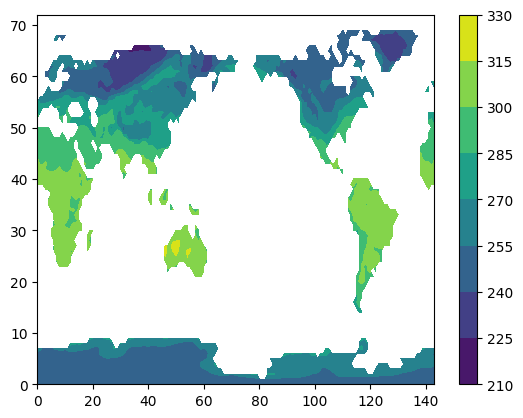

In [7]:
plt.contourf(ds['mx2t'][0,:,:])
plt.colorbar()

In [9]:
#Write the time format
ds['time'] = ds['time'].astype('datetime64[ns]')
print(ds['time'].dtype)
print(ds['time'])

start_date = np.datetime64('1979-01-01')
end_date = np.datetime64('2023-01-01')  # Adjust the end date as needed

# Create a time array with intervals of 1 day
time_array = np.arange(start_date, end_date, np.timedelta64(1, 'D'))

print(time_array)
ds['time'] = time_array

datetime64[ns]
<xarray.DataArray 'time' (time: 16071)>
array(['1979-01-01T00:00:00.000000000', '1979-01-02T00:00:00.000000000',
       '1979-01-03T00:00:00.000000000', ..., '2022-12-29T00:00:00.000000000',
       '2022-12-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
['1979-01-01' '1979-01-02' '1979-01-03' ... '2022-12-29' '2022-12-30'
 '2022-12-31']


In [10]:
# Convert Kelvin to Celsius
ds = ds - 273.15
#print(ds['t2m'])

In [11]:
#Select the month and location

#domain
#ds_t2m=ds.sel(time=ds.time.dt.month.isin([9])).sel(lat=slice(50,51),lon=slice(3,4))

#location
ds_t2m=ds.sel(time=ds.time.dt.month.isin([9])).sel(lat=50.5, lon=3.5, method="nearest")

/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [13]:
mx2t = ds_t2m['mx2t']

In [14]:
print(mx2t)

<xarray.DataArray 'mx2t' (time: 1320)>
array([26.011475, 19.253937, 17.96933 , ..., 14.200287, 14.20871 ,
       16.46457 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-09-01 1979-09-02 ... 2022-09-30
    lon      float64 2.5
    lat      float64 50.0


In [ ]:
#spatial average
#mx2t = mx2t1.mean(["lon", "lat"])

In [15]:
x_2020_max = mx2t.sel(time=slice('2020-09-01', '2020-09-30'))

In [16]:
print(x_2020_max)

<xarray.DataArray 'mx2t' (time: 30)>
array([18.406525, 18.918396, 22.593597, 21.207794, 18.659027, 18.483734,
       19.290985, 20.979797, 22.593628, 21.420502, 22.637787, 20.00534 ,
       23.702332, 29.523315, 30.016571, 26.933716, 20.584137, 24.917145,
       25.826843, 25.283325, 22.960083, 22.864899, 21.221466, 15.578613,
       12.053772, 11.694733, 16.396698, 14.155121, 18.084991, 17.623993],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-09-01 2020-09-02 ... 2020-09-30
    lon      float64 2.5
    lat      float64 50.0


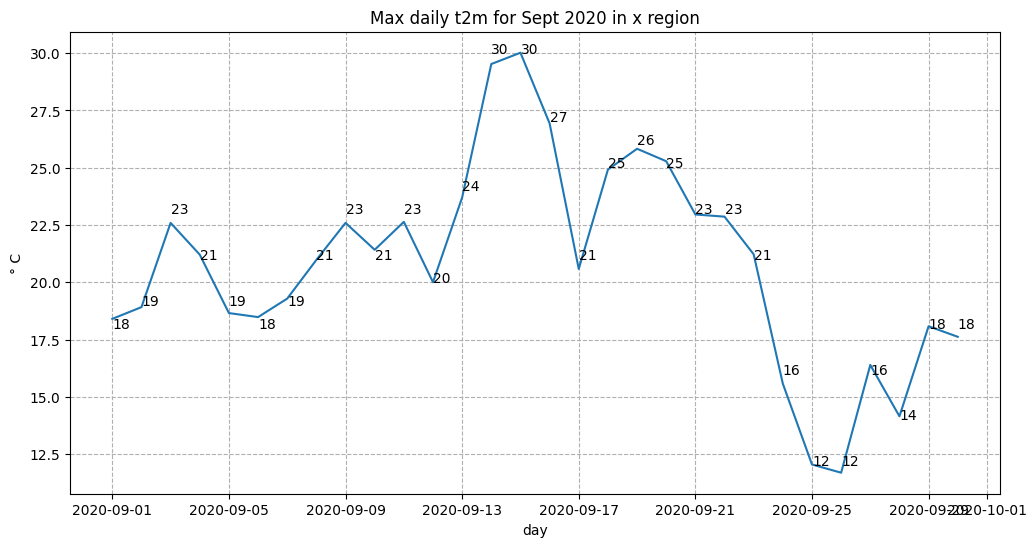

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.plot(x_2020_max.time, x_2020_max)
ax.set_title('Max daily t2m for Sept 2020 in x region')
ax.set_ylabel('° C')
ax.set_xlabel('day')
ax.grid(linestyle='--')
for i,j in zip(x_2020_max.time, np.around(x_2020_max.values, 0).astype(int)):
    ax.annotate(str(j),xy=(i,j))


In [18]:
print('The maximum temperature in Sept 2020 in this area was',
      np.around(x_2020_max.max().values, 1), 'degrees Celsius.')

The maximum temperature in Sept 2020 in this area was 30.0 degrees Celsius.


In [19]:
x_past = mx2t.loc['1979':'2022']

In [20]:
print(x_past)

<xarray.DataArray 'mx2t' (time: 1320)>
array([26.011475, 19.253937, 17.96933 , ..., 14.200287, 14.20871 ,
       16.46457 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-09-01 1979-09-02 ... 2022-09-30
    lon      float64 2.5
    lat      float64 50.0


In [22]:
x_max_mid = mx2t.groupby('time.day').quantile(0.5)
x_max_90  = mx2t.groupby('time.day').quantile(0.9)
x_max_10  = mx2t.groupby('time.day').quantile(0.1)

In [23]:
print(x_max_90)

<xarray.DataArray 'mx2t' (day: 30)>
array([23.96992798, 23.92915344, 24.25386353, 25.2899231 , 25.4713562 ,
       23.94650269, 25.0870636 , 24.39037781, 24.16878357, 24.55818481,
       23.59101257, 24.65544739, 21.53889771, 22.59457397, 23.49380188,
       22.86644592, 24.43103027, 24.78328552, 24.09251709, 24.35856934,
       24.48955078, 22.1270752 , 20.95370483, 21.80227661, 20.80397034,
       21.01238098, 21.28734131, 21.42284546, 20.77602844, 19.69801941])
Coordinates:
    quantile  float64 0.9
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30


/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
<ipython-input-24-a8e7f43e27df>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_2020_max.time.dt.day, x_2020_max, 'bo-', color='darkred', label='Daily max t2m July 2022')


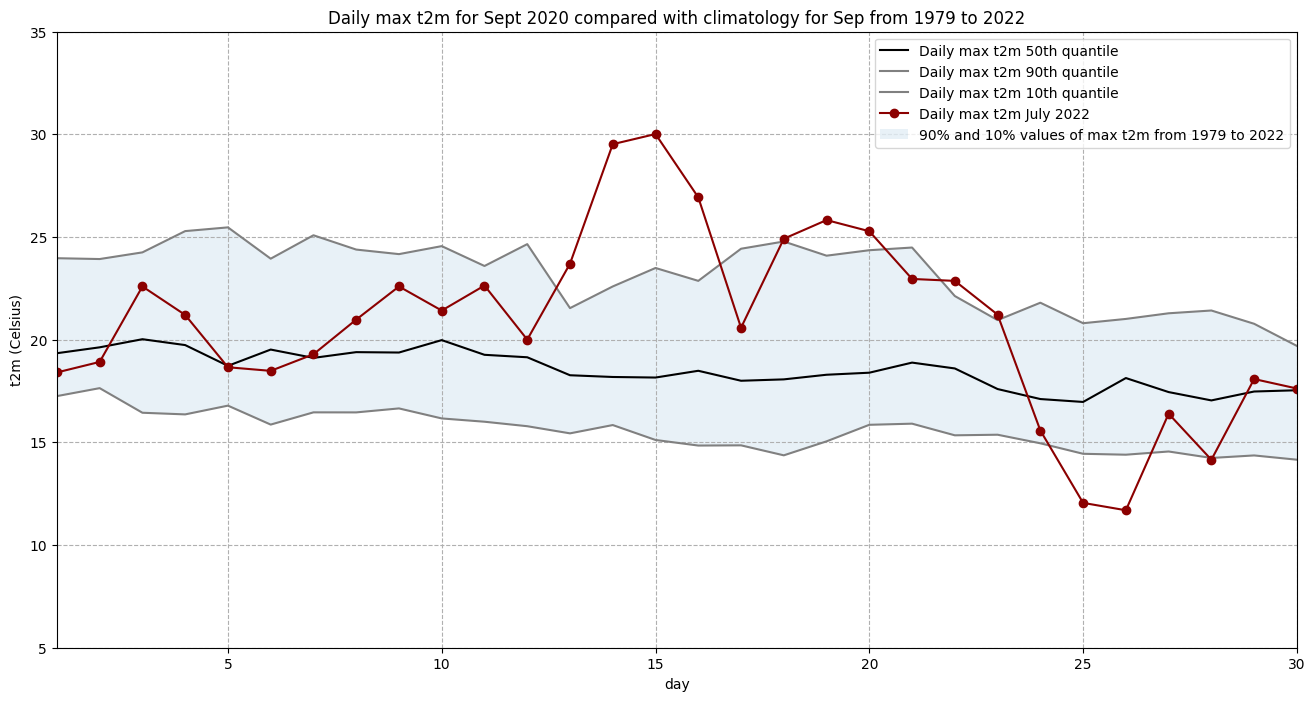

In [24]:
fig = plt.figure(figsize=(16,8))
ax = plt.subplot()

ax.plot(x_2020_max.time.dt.day, x_max_mid, color='black', label='Daily max t2m 50th quantile')
ax.plot(x_2020_max.time.dt.day, x_max_90, color='gray', label='Daily max t2m 90th quantile')
ax.plot(x_2020_max.time.dt.day, x_max_10, color='gray', label='Daily max t2m 10th quantile')
ax.plot(x_2020_max.time.dt.day, x_2020_max, 'bo-', color='darkred', label='Daily max t2m July 2022')
ax.fill_between(x_2020_max.time.dt.day, x_max_90, x_max_10, alpha=0.1,
                label='90% and 10% values of max t2m from 1979 to 2022')

ax.set_xlim(1,30)
ax.set_ylim(5,35)
ax.set_title('Daily max t2m for Sept 2020 compared with climatology for Sep from 1979 to 2022')
ax.set_ylabel('t2m (Celsius)')
ax.set_xlabel('day')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='--')

#fig.savefig(f'Max_t2m_clim_Sep_Lille.png')

Interestingly, we see from this plot that while the temperatures from 14 to 16 Sep 2020 were the highest in the ERA5 dataset, on 25 September 2020, the lowest of the maximum temperatures was recorded for this dataset.

We will now look more closely at the probability distribution of maximum temperatures for 15 September in this time period. To do this, we will first select only the max daily temperature for 15 September, for each year in the time series:

In [25]:
#x_max = x_max.dropna('time', how='all')
x_15 = mx2t[14::30]

(array([ 4.,  8., 10., 10.,  4.,  2.,  4.,  1.,  0.,  1.]),
 array([13.14056396, 14.82816505, 16.51576614, 18.20336533, 19.89096642,
        21.5785675 , 23.26616859, 24.95376968, 26.64136887, 28.32896996,
        30.01657104]),
 <BarContainer object of 10 artists>)

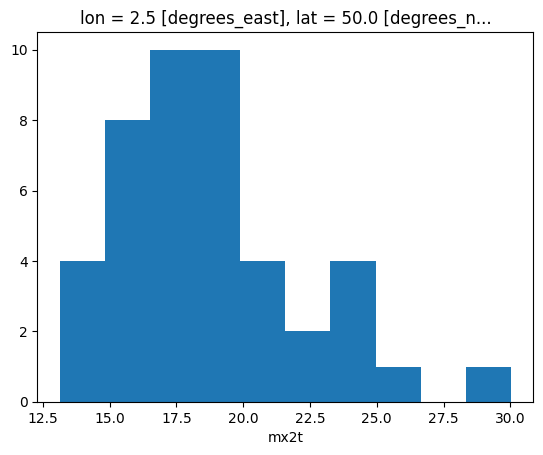

In [26]:
x_15.plot.hist()

Look at the range of maximum temperatures for 15 September in the period from 1979 to 2019. Has the temperature in this period ever exceeded that of 15 September 2020?

The histogram shows the distribution of maximum temperature of one day in each year of the time series, which corresponds to 41 samples. In order to increase the number of samples, let's plot the histogram of maximum temperatures on 15 September, plus or minus three days. This would increase our number of samples by a factor of seven.

To do this, we first need to produce an index that takes the maximum 2m air temperature values from 12 to 18 September (15 September +/- three days) from every year in the time series. The first step is to initiate three numpy arrays:


years: with the number of years [0:43]


days_in_sep: index values of day range [11:17]


index: empty numpy array with 308 (44 years * 7) entries

In [29]:
years = np.arange(44)
days_in_sep = np.arange(11,18)
index = np.zeros(308)

In a next step, we then loop through each entry of the years array and fill the empty index array year by year with the correct indices of the day ranges for each year. The resulting array contains the index values of interest.

In [31]:
for i in years:
    index[i*7:(i*7)+7] = days_in_sep + (i*30)
index = index.astype(int)

We then apply this index to filter the array of max daily temperature from 1979 to 2022. The resulting object is an array of values representing the maximum 2m air temperature in Lille between 12 and 18 September for each year from 1979 to 2022:

In [32]:
x_7days = mx2t.values[index]

Now we can plot the histogram of maximum daily temperatures in the days 12-18 September from 1979-2022:

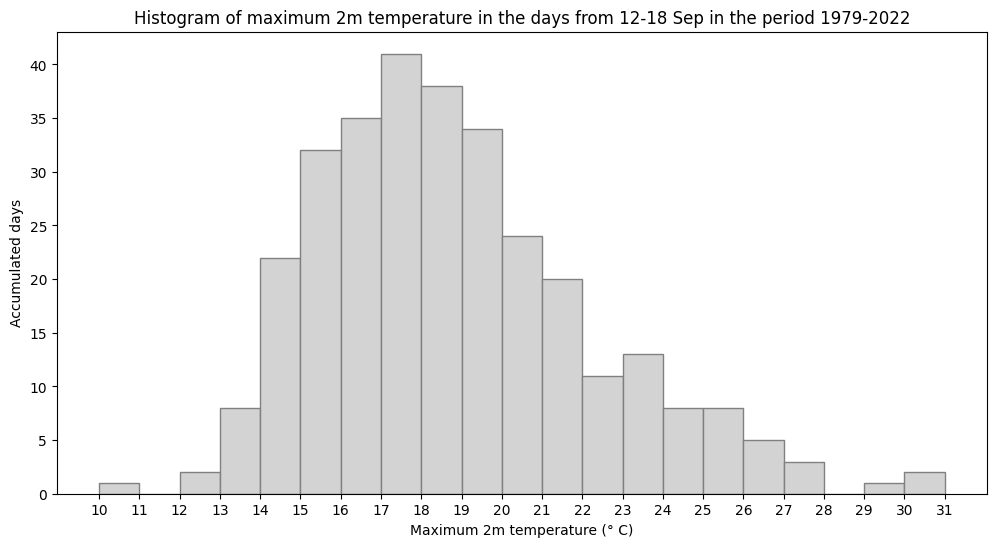

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(x_7days, bins = np.arange(10,32,1), color='lightgrey', ec='grey')
ax.set_title('Histogram of maximum 2m temperature in the days from 12-18 Sep in the period 1979-2022')
ax.set_xticks(np.arange(10,32,1))
ax.set_ylabel('Accumulated days')
ax.set_xlabel('Maximum 2m temperature (° C)')

fig.savefig(f'Hist_max_t2m_mid-Sep_1979-2019.png')

TCCIP Tmax data

Another dataset you can consider to use in your homework

In [36]:
# download TCCIP max T2M file with time from Wan-Ling's google drive.
#https://drive.google.com/file/d/1DRR69BWFp_7od16lec4VQxPaCV3RydCw/view?usp=sharing
!gdown 1DRR69BWFp_7od16lec4VQxPaCV3RydCw

Downloading...
From: https://drive.google.com/uc?id=1DRR69BWFp_7od16lec4VQxPaCV3RydCw
To: /content/tmax.1960-2021.daily.0.01deg-grid.nc
100% 32.8G/32.8G [06:03<00:00, 90.3MB/s]


In [37]:
filename ='tmax.1960-2021.daily.0.01deg-grid.nc'
ds_mx2t_tccip = xr.open_dataset(filename)

In [38]:
print(ds_mx2t_tccip)

<xarray.Dataset>
Dimensions:  (time: 22646, lon: 301, lat: 401)
Coordinates:
  * time     (time) float64 1.96e+07 1.96e+07 1.96e+07 ... 2.021e+07 2.021e+07
  * lon      (lon) float32 119.2 119.3 119.3 119.3 ... 122.2 122.2 122.2 122.2
  * lat      (lat) float32 21.75 21.76 21.77 21.78 ... 25.72 25.73 25.74 25.75
Data variables:
    temp     (time, lat, lon) float32 ...
    dis      (time, lat, lon) float32 ...
    std      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    title:        daily tavg data,make 2022.03 
    history:      Sun Sep 03 15:28:50 2023: cdo mergetime tmax.1960.daily.0.0...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...
